# Cytosol Only Cellpose Segmentation with adapted parameters to cellpose model call

In [1]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import CytosolOnlySegmentationCellpose
from scportrait.pipeline.selection import LMDSelection

/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project_location = "project_cytosol_only_custom_segmentation"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example1_custom_params.yml",
    overwrite=True,
    debug=True,
    segmentation_f=CytosolOnlySegmentationCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[26/02/2025 15:38:49] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_custom_segmentation/config.yml
[26/02/2025 15:38:49] Compression algorithm for extracted single-cell images: lzf
[26/02/2025 15:38:49] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1.


In [3]:
from scportrait.data._datasets import dataset_1

dataset_1_path = dataset_1()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_1_path}/Ch1.tif", f"{dataset_1_path}/Ch2.tif", f"{dataset_1_path }/Ch3.tif"]

project.load_input_from_tif_files(images)

[26/02/2025 15:38:49] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_custom_segmentation/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_on
         ly_custom_segmentation/scportrait.sdata                                                                   
[26/02/2025 15:38:49] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_k6k_oyv6 for Project
[26/02/2025 15:38:49] Image input_image written to sdata object.
[26/02/2025 15:38:49] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_k6k_oyv6'>


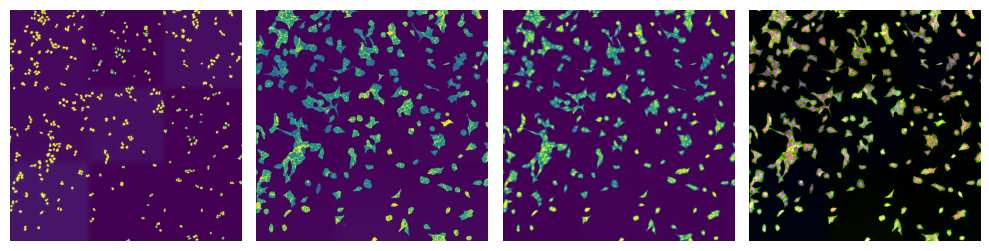

In [ ]:
# visualize input images as example
# it is not recommended to execute this block with large input images as it will compute for some time
from scportrait.plotting.vis import generate_composite

fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].imshow(project.input_image[0])
axs[0].axis("off")

axs[1].imshow(project.input_image[1])
axs[1].axis("off")

axs[2].imshow(project.input_image[2])
axs[2].axis("off")

img = generate_composite(project.input_image)

axs[3].imshow(img)
axs[3].axis("off")

fig.tight_layout()

In [5]:
from scportrait.data._datasets import custom_cellpose_model
custom_model_path = custom_cellpose_model()

project.config["CytosolOnlySegmentationCellpose"]["cytosol_segmentation"]["model_path"] = custom_model_path
project._update_segmentation_f(CytosolOnlySegmentationCellpose)

In [6]:
project.segment()

[26/02/2025 15:38:53] GPU Status for segmentation is True and will segment using the following device mps.
[26/02/2025 15:38:53] Segmentation will be performed wtih all 1 found GPUs.
[26/02/2025 15:38:53] GPU Status for segmentation is True with 1 GPUs found. Segmentation will be performed on the device mps with 1 processes per device in parallel.
[26/02/2025 15:38:53] Segmenting cytosol using the following model: /Users/sophia/Documents/GitHub/scPortrait/src/scportrait/scportrait_data/custom_cellpose_model/custom_cellpose_model.cpkt


/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[26/02/2025 15:39:00] Segmentation seg_all_cytosol written to sdata object.
[26/02/2025 15:39:02] Points centers_seg_all_cytosol written to sdata object.


(-0.5, 3036.5, 3038.5, -0.5)

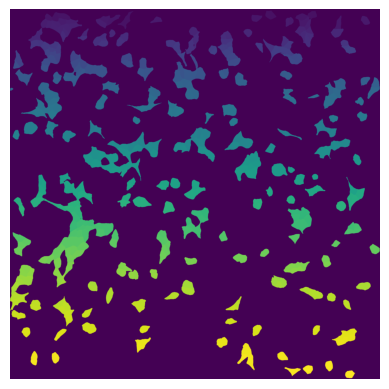

In [7]:
plt.figure()
plt.imshow(project.sdata["seg_all_cytosol"])
plt.axis("off")

In [8]:
project.extract()

[26/02/2025 15:39:17] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_2etkmnbr for HDF5CellExtraction
[26/02/2025 15:39:17] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_custom_segmentation/extraction/data
[26/02/2025 15:39:17] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_custom_segmentation/extraction/data
[26/02/2025 15:39:17] Found 1 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_cytosol']
[26/02/2025 15:39:17] Using seg_all_cytosol as the main segmentation mask to determine cell centers.
[26/02/2025 15:39:17] A total of 15 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait

Extracting cell batches: 100%|██████████| 5/5 [00:00<00:00, 25.22it/s]


[26/02/2025 15:39:18] Finished extraction in 0.45 seconds (1002.79 cells / second)
[26/02/2025 15:39:18] Benchmarking times saved to file.
[26/02/2025 15:39:18] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_2etkmnbr'>


(448, 4, 128, 128)


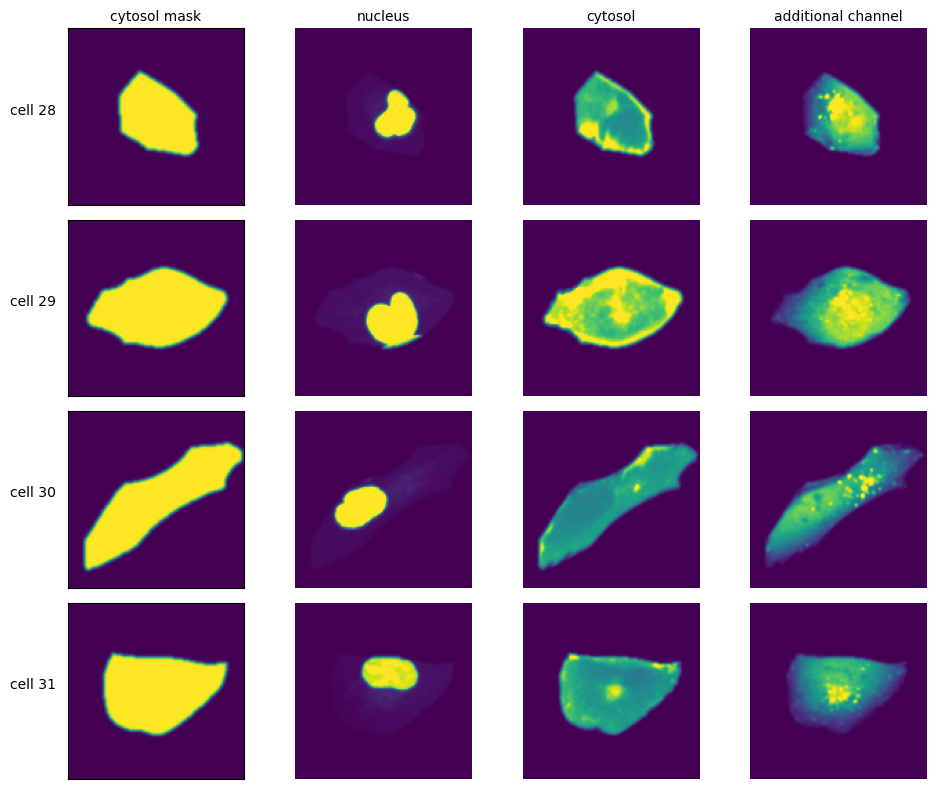

In [9]:
with h5py.File(f"{project_location}/extraction/data/single_cells.h5") as hf:
    index = hf.get("single_cell_index")
    images = hf.get("single_cell_data")

    print(images.shape)

    n_cells = [2, 3, 4, 5]
    fig, axs = plt.subplots(len(n_cells), 4, figsize=(5 * 2, len(n_cells) * 2))
    labels = ["cytosol mask", "nucleus", "cytosol", "additional channel"]

    for i, id in enumerate(n_cells):
        cell_id = index[id][1]
        image = images[id]

        for n, _img in enumerate(image):
            axs[i, n].imshow(_img)

            if n == 0:
                axs[i, n].set_ylabel(f"cell {cell_id}", fontsize=10, rotation=0, labelpad=25)
                axs[i, n].xaxis.set_visible(False)
                axs[i, n].tick_params(left=False, labelleft=False)
            else:
                axs[i, n].axis("off")

            if i == 0:
                axs[i, n].set_title(labels[n], fontsize=10)
    fig.tight_layout()

In [10]:
project.featurize()

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_custom_segmentation/extraction/data/single_cells.h5
[26/02/2025 15:40:02] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/CellFeaturizer_8te8t6ob for CellFeaturizer
[26/02/2025 15:40:02] Started CellFeaturization of all available channels.
[26/02/2025 15:40:02] Overwrite flag is set, deleting existing directory for featurization results.
[26/02/2025 15:40:02] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_custom_segmentation/featurization/complete_CellFeaturizer
[26/02/2025 15:40:02] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[26/02/2025 15:40:02] Reading data from path: /Users/sophia/Documents/GitHub/scPort

In [11]:
# load classification results
results = pd.read_csv(f"{project_location}/featurization/complete_CellFeaturizer/calculated_image_features.csv")
results

,cytosol_area,1_mean_cytosol,1_median_cytosol,1_quant75_cytosol,1_quant25_cytosol,1_summed_intensity_cytosol,1_summed_intensity_area_normalized_cytosol,2_mean_cytosol,2_median_cytosol,2_quant75_cytosol,...,2_summed_intensity_cytosol,2_summed_intensity_area_normalized_cytosol,3_mean_cytosol,3_median_cytosol,3_quant75_cytosol,3_quant25_cytosol,3_summed_intensity_cytosol,3_summed_intensity_area_normalized_cytosol,label,cell_id
0,6873.0,0.073960,0.0,0.026337,0.0,1211.75430,0.176306,0.217811,0.0,6.147461e-01,...,3568.6174,0.519223,0.110352,0.0,1.206665e-01,0.0,1808.0054,0.263059,0,24
1,4115.0,0.055963,0.0,0.000000,0.0,916.89825,0.222819,0.114197,0.0,2.980232e-07,...,1871.0037,0.454679,0.099898,0.0,1.192093e-07,0.0,1636.7224,0.397745,0,25
2,3336.0,0.045540,0.0,0.000000,0.0,746.12220,0.223658,0.100321,0.0,0.000000e+00,...,1643.6582,0.492703,0.089063,0.0,0.000000e+00,0.0,1459.2086,0.437413,0,28
3,5174.0,0.074726,0.0,0.014950,0.0,1224.30680,0.236627,0.202450,0.0,1.155396e-01,...,3316.9443,0.641079,0.151604,0.0,2.568436e-02,0.0,2483.8740,0.480068,0,29
4,5612.0,0.058247,0.0,0.013548,0.0,954.31970,0.170050,0.131319,0.0,1.262512e-01,...,2151.5276,0.383380,0.111616,0.0,2.256012e-02,0.0,1828.7188,0.325859,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,4145.0,0.034810,0.0,0.000000,0.0,570.32306,0.137593,0.143054,0.0,5.960465e-08,...,2343.7954,0.565451,0.092280,0.0,0.000000e+00,0.0,1511.9150,0.364756,0,501
444,3123.0,0.057396,0.0,0.000000,0.0,940.37036,0.301111,0.099154,0.0,0.000000e+00,...,1624.5374,0.520185,0.080199,0.0,0.000000e+00,0.0,1313.9730,0.420741,0,502
445,5376.0,0.037229,0.0,0.001244,0.0,609.96000,0.113460,0.201304,0.0,1.752930e-01,...,3298.1606,0.613497,0.124276,0.0,8.497238e-03,0.0,2036.1375,0.378746,0,503
446,5421.0,0.051782,0.0,0.002118,0.0,848.39670,0.156502,0.172909,0.0,2.497559e-01,...,2832.9429,0.522587,0.128313,0.0,3.493500e-02,0.0,2102.2756,0.387802,0,504


In [12]:
#test selection workflow
selected_cells_large = results[results.cytosol_area > 4500]["cell_id"].tolist()
selected_cells_small = results[results.cytosol_area < 3000]["cell_id"].tolist()

cells_to_select = [
    {"name": "large_cells", "classes": selected_cells_large, "well": "A1"},
    {"name": "small_cells", "classes": selected_cells_small, "well": "B1"},
]

marker_0 = (0, 0)
marker_1 = (2000, 0)
marker_2 = (0, 2000)

calibration_marker = np.array([marker_0, marker_1, marker_2])

In [13]:
project.selection_f.segmentation_channel_to_select = "seg_all_cytosol" #update to the correct channel for this notebook with out loading a different config
project.select(cells_to_select, calibration_marker)

[26/02/2025 15:40:09] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./LMDSelection__p4w5_ij for LMDSelection
[26/02/2025 15:40:09] Selection process started.


Processing cell batches:   0%|          | 0/3 [00:00<?, ?it/s]


TypeError: h5py objects cannot be pickled